# Primeras pruebas de modelado con los datos 

In [1]:
import pandas as pd
import pymc as pm
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pytensor  


In [2]:
# read data
df = pd.read_csv("../data/clean/clean2_final_nutricion_salud.csv")

In [3]:
df

,folio,intp,entidad,municipio,localidad,sexo,edad_meses,edad_anios,peso_kg,talla_cm,...,folio_vivienda,meses,afilia_1ra,afilia_tras,pondei,deciles,pondeh,grupo_edad,imc,edad_anios_calc
0,100001.0,3.0,10.0,1.0,5.0,2.0,104.344969,8.695414,27.150,132.45,...,100001,7.0,0.0,0.0,137.820655,3.0,148.069240,5-10 años,15.476256,8.695414
1,100006.0,6.0,10.0,1.0,5.0,2.0,134.537988,11.211499,32.075,140.40,...,191703M,5.0,6.0,6.0,423.061428,3.0,405.165663,10-15 años,16.271682,11.211499
2,100008.0,10.0,10.0,1.0,5.0,1.0,90.743326,7.561944,21.200,118.40,...,100008,5.0,0.0,0.0,153.748303,1.0,148.069240,5-10 años,15.122809,7.561944
3,100009.0,3.0,10.0,1.0,5.0,2.0,75.334702,6.277892,32.475,119.95,...,100009,2.0,0.0,0.0,156.810281,2.0,148.069240,5-10 años,22.570888,6.277892
4,100010.0,7.0,10.0,1.0,5.0,1.0,97.741273,8.145106,21.300,132.10,...,100010,0.0,6.0,6.0,171.843150,1.0,148.069240,5-10 años,12.206017,8.145106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25350,70328.0,8.0,7.0,23.0,139.0,2.0,11.531828,0.960986,7.700,63.40,...,070328,10.0,0.0,0.0,473.227844,1.0,469.096995,0-1 año,19.156326,0.960986
25351,70330.0,6.0,7.0,23.0,139.0,2.0,18.661191,1.555099,10.400,74.75,...,070330,5.0,0.0,0.0,473.227844,1.0,469.096995,1-2 años,18.612767,1.555099
25352,70333.0,5.0,7.0,26.0,30.0,1.0,54.702259,4.558522,13.850,95.40,...,070333,5.0,6.0,6.0,463.513647,1.0,412.965732,2-5 años,15.217840,4.558522
25353,70334.0,7.0,7.0,26.0,30.0,2.0,19.121150,1.593429,10.825,78.50,...,070334,6.0,6.0,6.0,416.602292,1.0,412.965732,1-2 años,17.566636,1.593429


In [4]:
df.columns.tolist()

['folio',
 'intp',
 'entidad',
 'municipio',
 'localidad',
 'sexo',
 'edad_meses',
 'edad_anios',
 'peso_kg',
 'talla_cm',
 'zscore_imc_para_edad',
 'clasificacion_imc',
 'ponderador',
 'region',
 'id_persona',
 'num_integrante',
 'edad_dias',
 'fecha_nacimiento',
 'fecha_visita',
 'altitud_localidad',
 'code_upm',
 'estrato_diseño',
 'estrato_urbanidad',
 'estrato_marginalidad',
 'estrato_varianza',
 'area_urbana_rural',
 'region_geo',
 'ageb',
 'indice_socioeconomico',
 'afiliacion_salud',
 'nivel_socioecon_decil',
 'nivel_socioecon_quintil',
 'nivel_socioecon_tercil',
 'ponderador_muestra',
 'tipo_hemocue',
 'hemoglobina_g_dl',
 'hemoglobina_ajustada_g_dl',
 'anemia',
 'folio_consecutivo',
 'munici',
 'locali',
 'edad',
 'dia_nac',
 'mes_nac',
 'anio_nac',
 'est_urb',
 'est_marg',
 'pondef',
 'folio_vivienda',
 'meses',
 'afilia_1ra',
 'afilia_tras',
 'pondei',
 'deciles',
 'pondeh',
 'grupo_edad',
 'imc',
 'edad_anios_calc']

In [5]:
print(df["municipio"].nunique())
print(df["localidad"].nunique())  

177
319


In [6]:
# Filtramos observaciones con datos completos de talla, edad y sexo
df_model = df[["talla_cm", "edad_anios_calc", "sexo", "peso_kg", "municipio", "id_persona"]].dropna()

In [7]:
# Establecemos 'id_persona' como índice del DataFrame
df_model = df_model.set_index("id_persona")


In [8]:
df_model.dtypes

talla_cm           float64
edad_anios_calc    float64
sexo               float64
peso_kg            float64
municipio          float64
dtype: object

<Axes: ylabel='Frequency'>

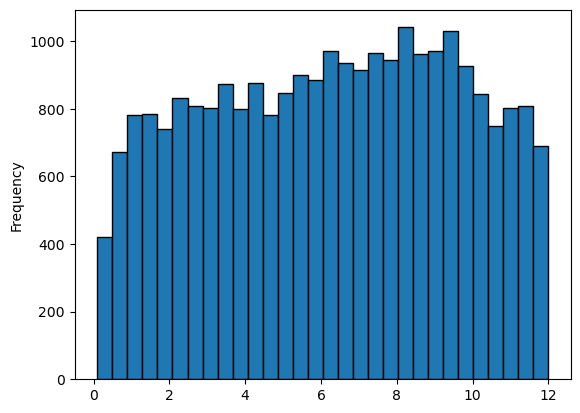

In [9]:
df_model["edad_anios_calc"].plot(kind="hist", bins=30, edgecolor="black")

In [10]:
df_model["edad_anios_calc"].describe()

count    25355.000000
mean         6.266160
std          3.265484
min          0.098563
25%          3.498973
50%          6.412047
75%          9.021218
max         11.997262
Name: edad_anios_calc, dtype: float64

<Axes: ylabel='Frequency'>

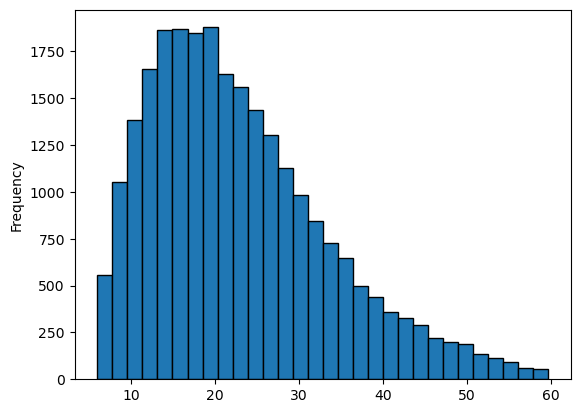

In [11]:
df_model["peso_kg"].plot(kind="hist", bins=30, edgecolor="black")

In [12]:
df_model["peso_kg"].describe()

count    25355.000000
mean        22.876571
std         10.653493
min          5.950000
25%         14.750000
50%         20.900000
75%         28.950000
max         59.700000
Name: peso_kg, dtype: float64

In [13]:
df_model["sexo"].value_counts()

sexo
1.0    12770
2.0    12585
Name: count, dtype: int64

<Axes: xlabel='sexo', ylabel='peso_kg'>

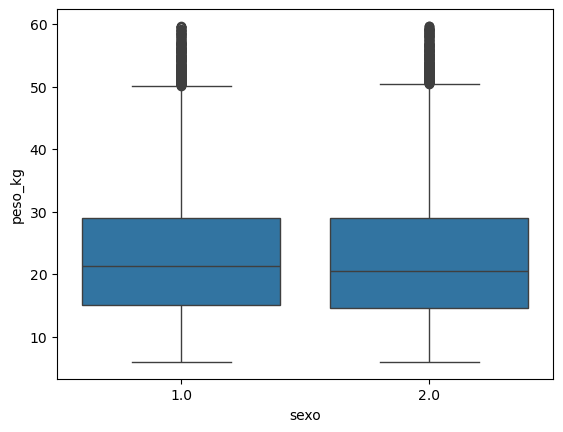

In [14]:
# boxplot de sexo
sns.boxplot(x="sexo", y="peso_kg", data=df_model)


In [15]:
df_model["sexo"]

id_persona
100001_3     2.0
100006_6     2.0
100008_10    1.0
100009_3     2.0
100010_7     1.0
            ... 
70328_8      2.0
70330_6      2.0
70333_5      1.0
70334_7      2.0
70336_4      2.0
Name: sexo, Length: 25355, dtype: float64

In [16]:
# Codificamos correctamente sexo 
# Recodeamos sexo: 0 = mujer, 1 = hombre
df_model["sexo"] = df_model["sexo"].map({2: 0, 1: 1})


In [17]:
# Confirmamos los tipos de variables y que no haya NAs
df_model.info()
df_model.describe()
df_model["sexo"].value_counts()
df_model["municipio"].nunique()

<class 'pandas.core.frame.DataFrame'>
Index: 25355 entries, 100001_3 to 70336_4
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   talla_cm         25355 non-null  float64
 1   edad_anios_calc  25355 non-null  float64
 2   sexo             25355 non-null  int64  
 3   peso_kg          25355 non-null  float64
 4   municipio        25355 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 2.2+ MB


177

In [18]:

# Codificamos cada municipio con un índice entero único (de 0 a n_grupos - 1)
df_model["municipio_idx"] = pd.Categorical(df_model["municipio"]).codes

# Verificamos que se creó correctamente
df_model[["municipio", "municipio_idx"]].drop_duplicates().sort_values("municipio_idx").head()



,municipio,municipio_idx
id_persona,,
100001_3,1.0,0
11276_3,2.0,1
110044_5,3.0,2
100075_5,4.0,3
100121_6,5.0,4


In [19]:
# Número de municipios únicos
n_municipios = df_model["municipio_idx"].nunique()

with pm.Model() as modelo_simple:

    # 1️⃣ PRIORS GLOBALES
    beta_0 = pm.Normal("beta_0", mu=125, sigma=10)           # Intercepto general
    beta_edad = pm.Normal("beta_edad", mu=5, sigma=2)        # Efecto de la edad
    beta_sexo = pm.Normal("beta_sexo", mu=3, sigma=2)        # Efecto del sexo

    # 2️⃣ NIVEL 2: EFECTO ALEATORIO POR MUNICIPIO
    sigma_grupo = pm.HalfNormal("sigma_grupo", sigma=5)      # Desviación entre municipios
    alpha_j = pm.Normal("alpha_j", mu=0, sigma=sigma_grupo, shape=n_municipios)

    # 3️⃣ DESVIACIÓN RESIDUAL
    sigma_obs = pm.HalfNormal("sigma_obs", sigma=5)          # Desviación individual

    # 4️⃣ MEDIA ESPERADA
    mu = (
        beta_0
        + beta_edad * df_model["edad_anios_calc"].values
        + beta_sexo * df_model["sexo"].values
        + alpha_j[df_model["municipio_idx"].values]
    )

    # 5️⃣ LIKELIHOOD
    talla_obs = pm.Normal("talla_obs", mu=mu, sigma=sigma_obs, observed=df_model["talla_cm"].values)

    # 6️⃣ INFERENCIA
    trace = pm.sample(1000, tune=1000, target_accept=0.9, random_seed=42, return_inferencedata=True)


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_0, beta_edad, beta_sexo, sigma_grupo, alpha_j, sigma_obs]


/opt/anaconda3/envs/pymc_env/lib/python3.10/site-packages/rich/live.py:256: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 22 seconds.


In [20]:
# Resumen de parámetros globales
az.summary(trace, var_names=["beta_0", "beta_edad", "beta_sexo", "sigma_grupo", "sigma_obs"], round_to=5)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_0,70.59187,0.15011,70.30289,70.86827,0.00606,0.00299,611.21637,1176.50091,1.00181
beta_edad,6.48963,0.01158,6.46766,6.51127,0.00017,0.00018,4666.14797,2877.46682,1.00039
beta_sexo,0.43541,0.07657,0.28979,0.57838,0.00105,0.00117,5296.86566,3179.34108,0.99950
sigma_grupo,1.47886,0.11825,1.26368,1.69681,0.00272,0.00144,1877.42016,2843.58095,1.00082
sigma_obs,6.10436,0.02761,6.05412,6.15842,0.00034,0.00046,6544.68555,2943.40594,1.00136


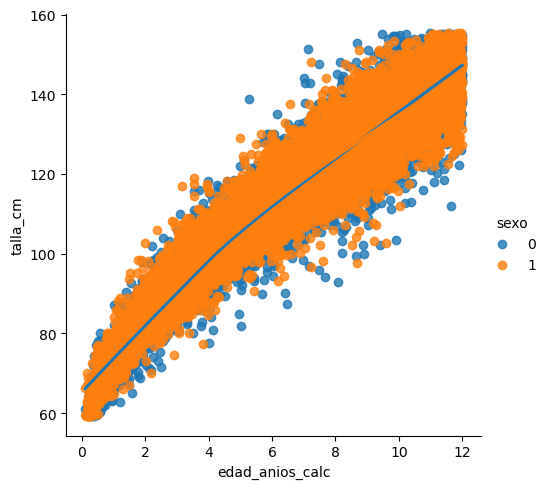

In [21]:
sns.lmplot(data=df_model, x="edad_anios_calc", y="talla_cm", hue="sexo", lowess=True)
